<h1> Boston Housing Prices Dataset: Análise de exploração de dados</h1>

Neste projeto, avalia-se o desempenho e o poder preditivo de um modelo que foi treinado e testado em dados coletados de residências nos subúrbios de Boston, Massachusetts. Um modelo treinado nesses dados que é visto como um bom ajuste pode ser usado para fazer certas previsões sobre o valor monetário de uma casa.

<h1> Exploração de dados <h1>

Uma investigação sobre os dados habitacionais de Boston e necessaria. Uma vez que o objetivo principal deste projeto é construir um modelo de trabalho que tenha a capacidade de prever o valor das casas, separamos o conjunto de dados em características e a variável alvo.

In [4]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

#Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [5]:
#O dataframe esta disponivel no Kaggle
housing_train_df = pd.read_csv('train.csv')
housing_test_df = pd.read_csv('test.csv')

In [6]:
housing_train_df.shape, housing_test_df.shape

((1460, 81), (1459, 80))

Os tamanhos dos conjuntos de dados mostram que 1460 linhas para treinar o modelo e 1459 linhas para prever seus preços. O conjunto de dados do test tem uma coluna extra que é o SalePrice das casas.

Informacoes de descricoes das variaveis dos datasets.

In [5]:
housing_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
housing_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
housing_test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [8]:
housing_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
housing_test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


Visualizando dados que estao faltando nos datasets

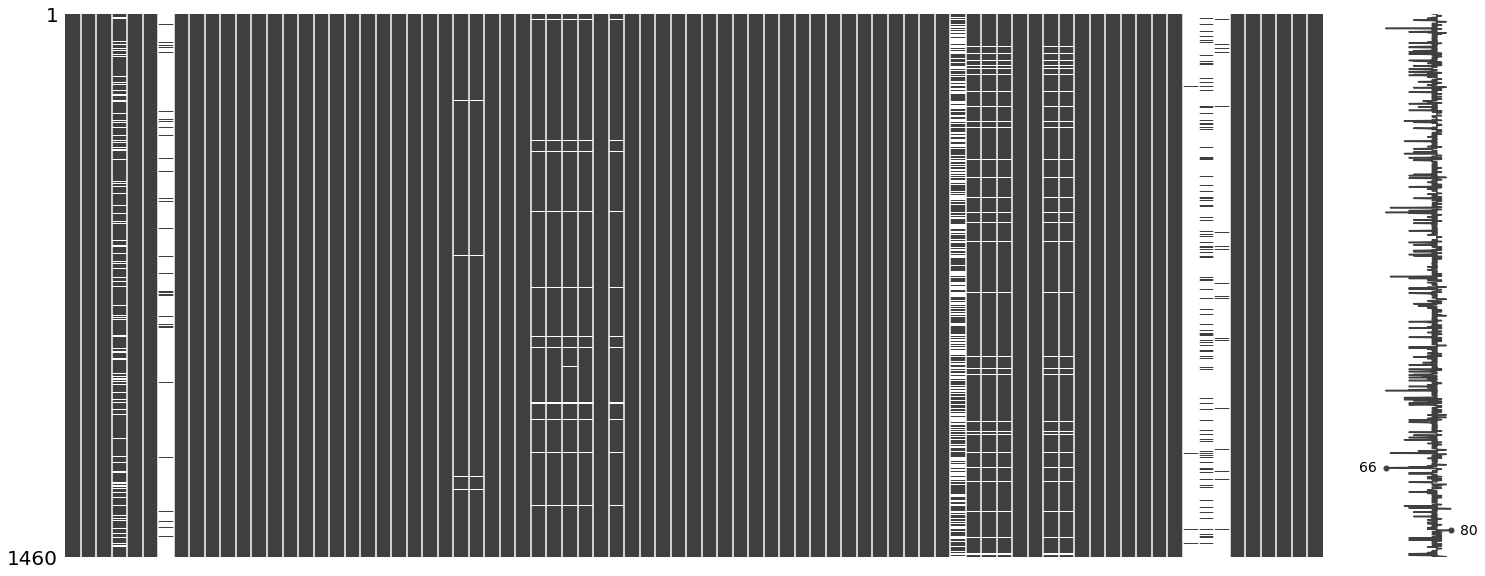

In [98]:
missingno.matrix(housing_train_df)

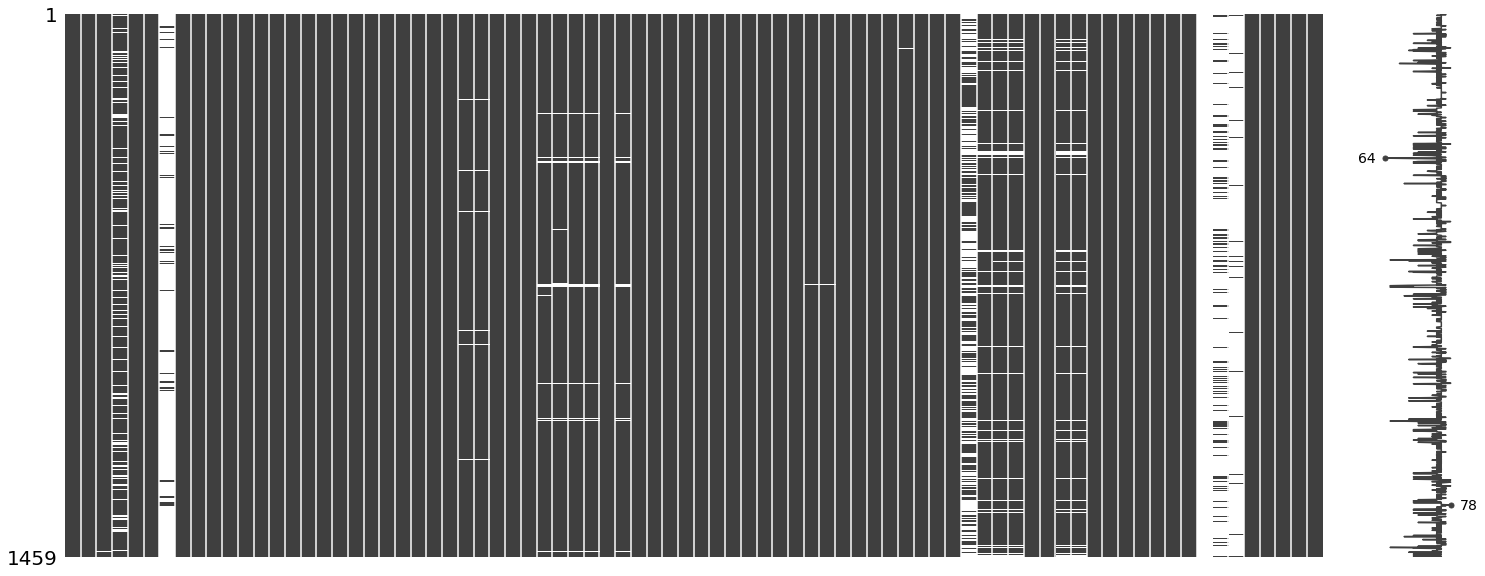

In [99]:
missingno.matrix(housing_test_df)

A partir das informações acima nota-se uma quantidade desigual de pontos de dados nos conjuntos de dados. O que implica que provavelmente tem-se alguns valores ausentes. Portanto e necessario substituir ou eliminar esses valores ausentes para que não resultem em discrepâncias em nossos cálculos. Verificando valores NaN estão presentes em cada conjunto de dados.

In [62]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [63]:
missing_percentage(housing_train_df)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [47]:
missing_percentage(housing_test_df)

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageYrBlt,78,5.35
GarageQual,78,5.35
GarageFinish,78,5.35
GarageCond,78,5.35


O conjunto de dados de trem tem 19 recursos com um mínimo de 1 valor ausente, o conjunto de dados de teste tem 33 recursos com um mínimo de 1 valor ausente. Embora alguns dos recursos tenham uma quantidade considerável de valores ausentes, alguns deles têm quantidades insignificantes. Portanto, serão utilizados diferentes métodos para lidar com diferentes recursos que possuem valores ausentes.

Observando descrição das colunas, nota-se alguns dos valores ausentes não devem ser valores mas sim um valor 'Nenhum' para recursos categóricos e valor '0' para recursos numéricos.

In [66]:
salesprice = housing_train_df['SalePrice']
missing_value_0 = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt','GarageArea','GarageCars','MasVnrArea']

for i in missing_value_0:
    housing_train_df[i] = housing_train_df[i].fillna(0)
    housing_test_df[i] = housing_test_df[i].fillna(0)
    
missing_value_none = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']

for i in missing_value_none:
    housing_train_df[i] = housing_train_df[i].fillna('None')
    housing_test_df[i] = housing_test_df[i].fillna('None')

In [67]:
sqr_lot_area_data = np.sqrt(housing_train_df['LotArea'])
sqr_lot_area_data = np.sqrt(housing_test_df['LotArea'])

housing_train_df['LotFrontage'] = sqr_lot_area_data.round(2) 
housing_test_df['LotFrontage'] = sqr_lot_area_data.round(2) 

In [68]:
missing_percentage(housing_train_df), missing_percentage(housing_test_df)

(             Total  Percent
 Electrical       1     0.07
 LotFrontage      1     0.07,              Total  Percent
 MSZoning         4     0.27
 Functional       2     0.14
 Utilities        2     0.14
 Exterior2nd      1     0.07
 SaleType         1     0.07
 Exterior1st      1     0.07
 KitchenQual      1     0.07)

Após a fixação dos valores 'Nenhum' e '0', o número de valores omissos foi reduzido para apenas 9. E há apenas uma coluna que possui uma quantidade considerável de valores ausentes, que é LotFrontage. Estima-se LotFrontage de acordo com LotArea e usa-se os valores restantes para os outros valores ausentes.

In [69]:
housing_train_df['MSZoning'] = housing_train_df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
housing_train_df['Utilities'] = housing_train_df['Utilities'].fillna(housing_train_df['Utilities'].mode()[0]) 
housing_train_df['Functional'] = housing_train_df['Functional'].fillna(housing_train_df['Functional'].mode()[0]) 
housing_train_df['Electrical'] = housing_train_df['Electrical'].fillna(housing_train_df['Electrical'].mode()[0]) 
housing_train_df['KitchenQual'] = housing_train_df['KitchenQual'].fillna(housing_train_df['KitchenQual'].mode()[0]) 
housing_train_df['Exterior2nd'] = housing_train_df['Exterior2nd'].fillna(housing_train_df['Exterior2nd'].mode()[0])
housing_train_df['Exterior1st'] = housing_train_df['Exterior1st'].fillna(housing_train_df['Exterior1st'].mode()[0]) 
housing_train_df['SaleType'] = housing_train_df['SaleType'].fillna(housing_train_df['SaleType'].mode()[0])

housing_test_df['MSZoning'] = housing_test_df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
housing_test_df['Utilities'] = housing_test_df['Utilities'].fillna(housing_test_df['Utilities'].mode()[0]) 
housing_test_df['Functional'] = housing_test_df['Functional'].fillna(housing_test_df['Functional'].mode()[0]) 
housing_test_df['Electrical'] = housing_test_df['Electrical'].fillna(housing_test_df['Electrical'].mode()[0]) 
housing_test_df['KitchenQual'] = housing_test_df['KitchenQual'].fillna(housing_test_df['KitchenQual'].mode()[0]) 
housing_test_df['Exterior2nd'] = housing_test_df['Exterior2nd'].fillna(housing_test_df['Exterior2nd'].mode()[0])
housing_test_df['Exterior1st'] = housing_test_df['Exterior1st'].fillna(housing_test_df['Exterior1st'].mode()[0]) 
housing_test_df['SaleType'] = housing_test_df['SaleType'].fillna(housing_test_df['SaleType'].mode()[0])

In [70]:
housing_train_df['SalePrice'] = salesprice

Correlação e visualização de dados

Histograma de distribuicao dos valores dos imoveis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


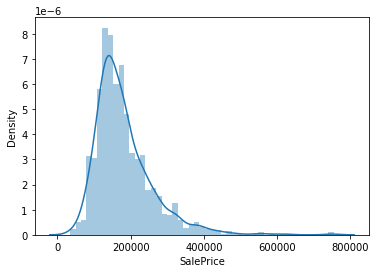

In [27]:
sns.distplot(housing_train_df['SalePrice'])

A correlação entre cada variavel.


In [47]:
corr = housing_train_df.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.023936,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.312004,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.023936,-0.312004,1.000000,0.909303,0.163756,-0.009502,0.027397,0.027796,0.136050,0.251238,...,0.212730,0.133978,-0.007456,0.043598,0.080655,0.100240,0.046858,0.003831,-0.025037,0.366675
LotArea,-0.033226,-0.139781,0.909303,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.163756,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.009502,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.027397,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.027796,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.136050,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.251238,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Como o conjunto de dados é grande não se pode ver claramente a correlação entre os recursos. A melhor maneira de fazer isso é criar um mapa de calor de todos os recursos.

Mapa de calor 1

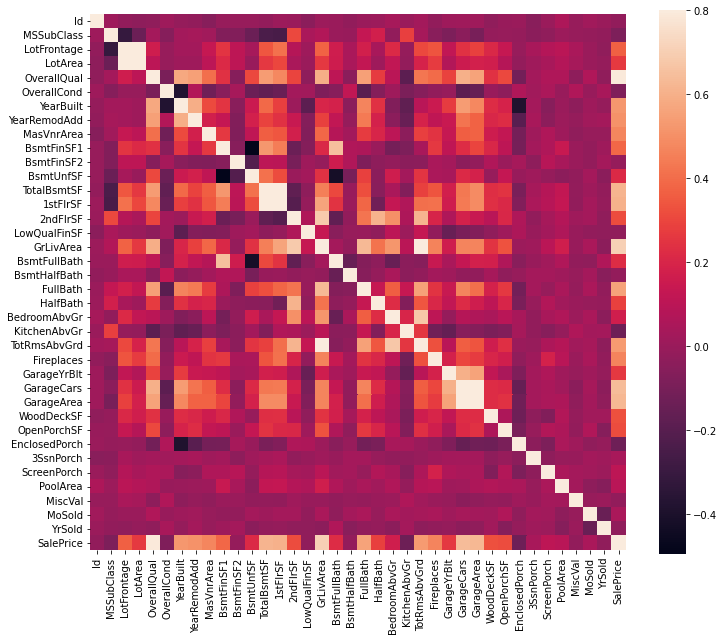

In [48]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, vmax=.8, square=True)

Ampliando para entender melhor algumas das correlações e adicionar alguns números para esclarecer as cores.

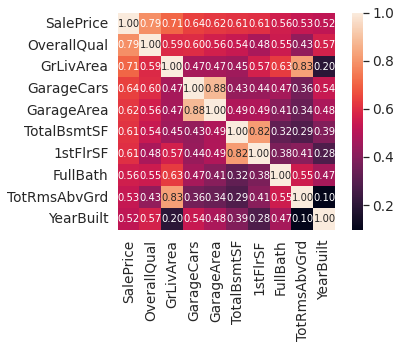

In [ ]:
k = 10 #numero de variaveis
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing_train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Mapa de calor 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


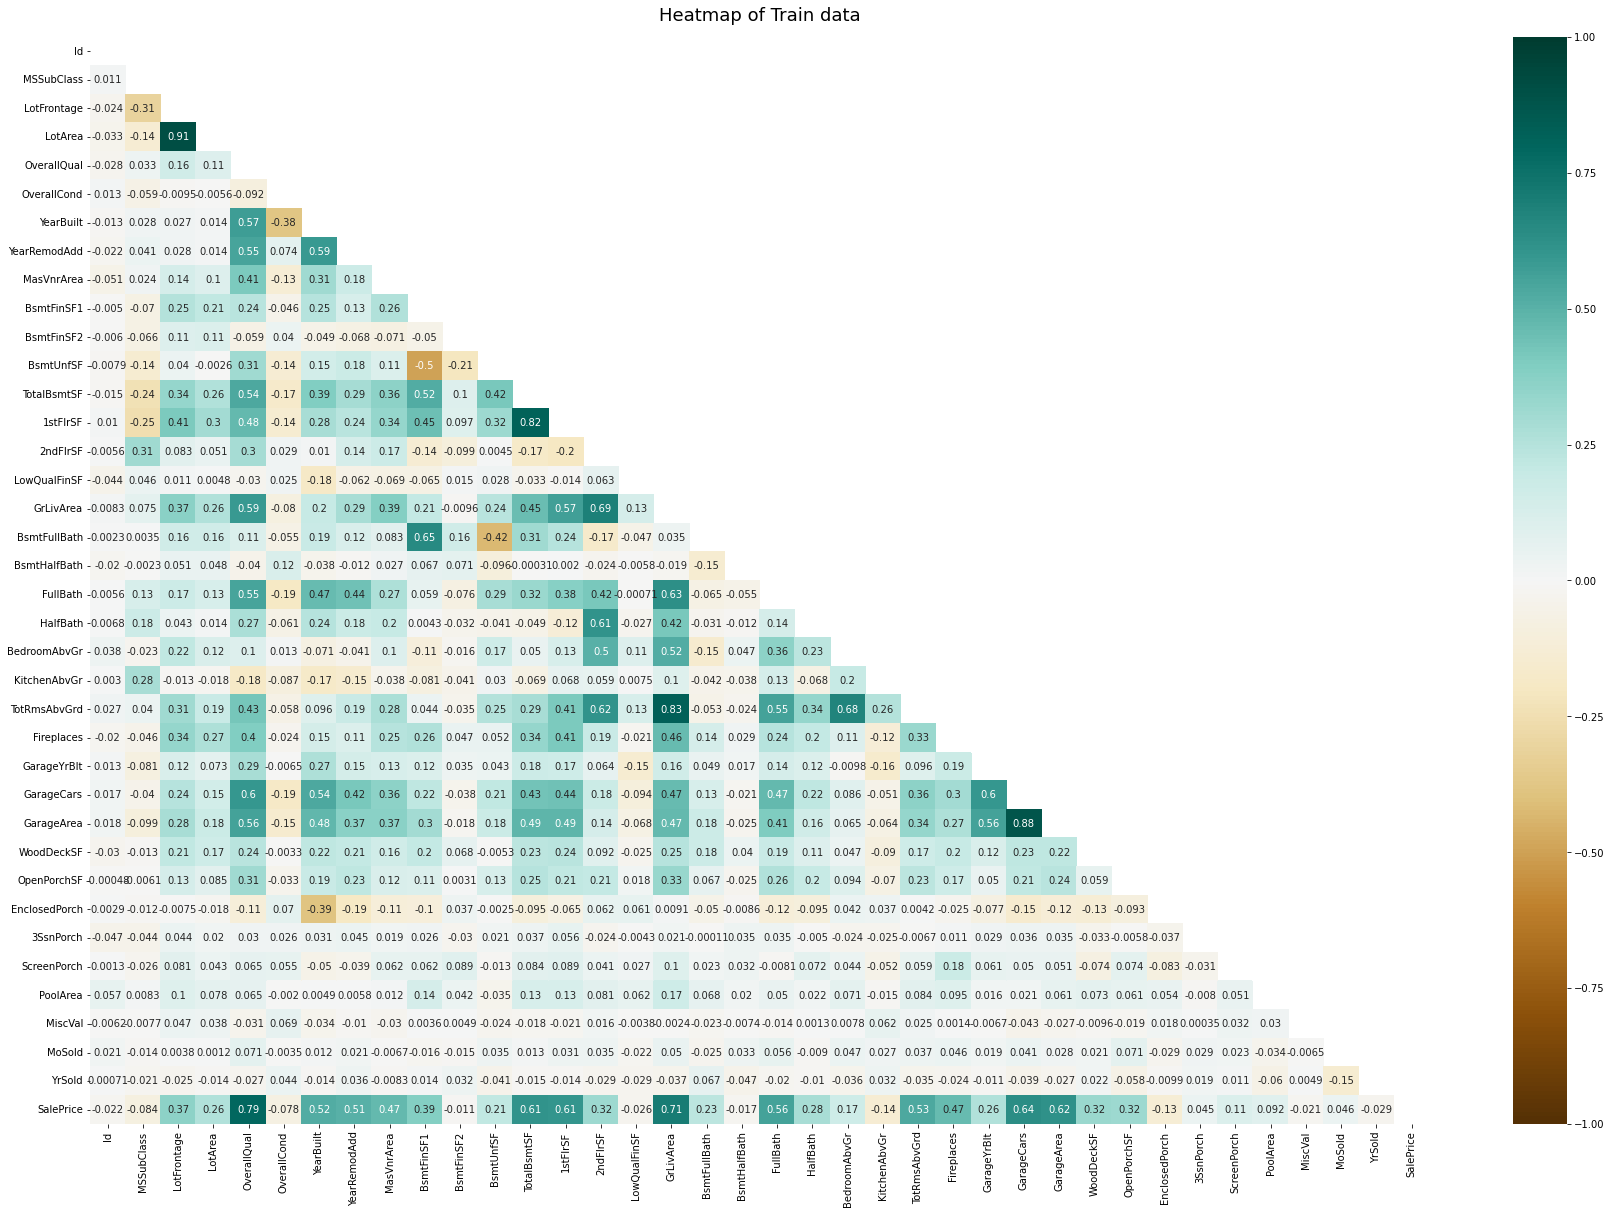

In [51]:
plt.figure(figsize=(30, 20))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(housing_train_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(housing_train_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap of Train data', fontdict={'fontsize':18}, pad=16);

Nota-se que o preço de venda tem uma correlação positiva com a qualidade geral, área de estar, carros de garagem e área de garagem. Plot explorando as correlacoes entre as variaveis.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


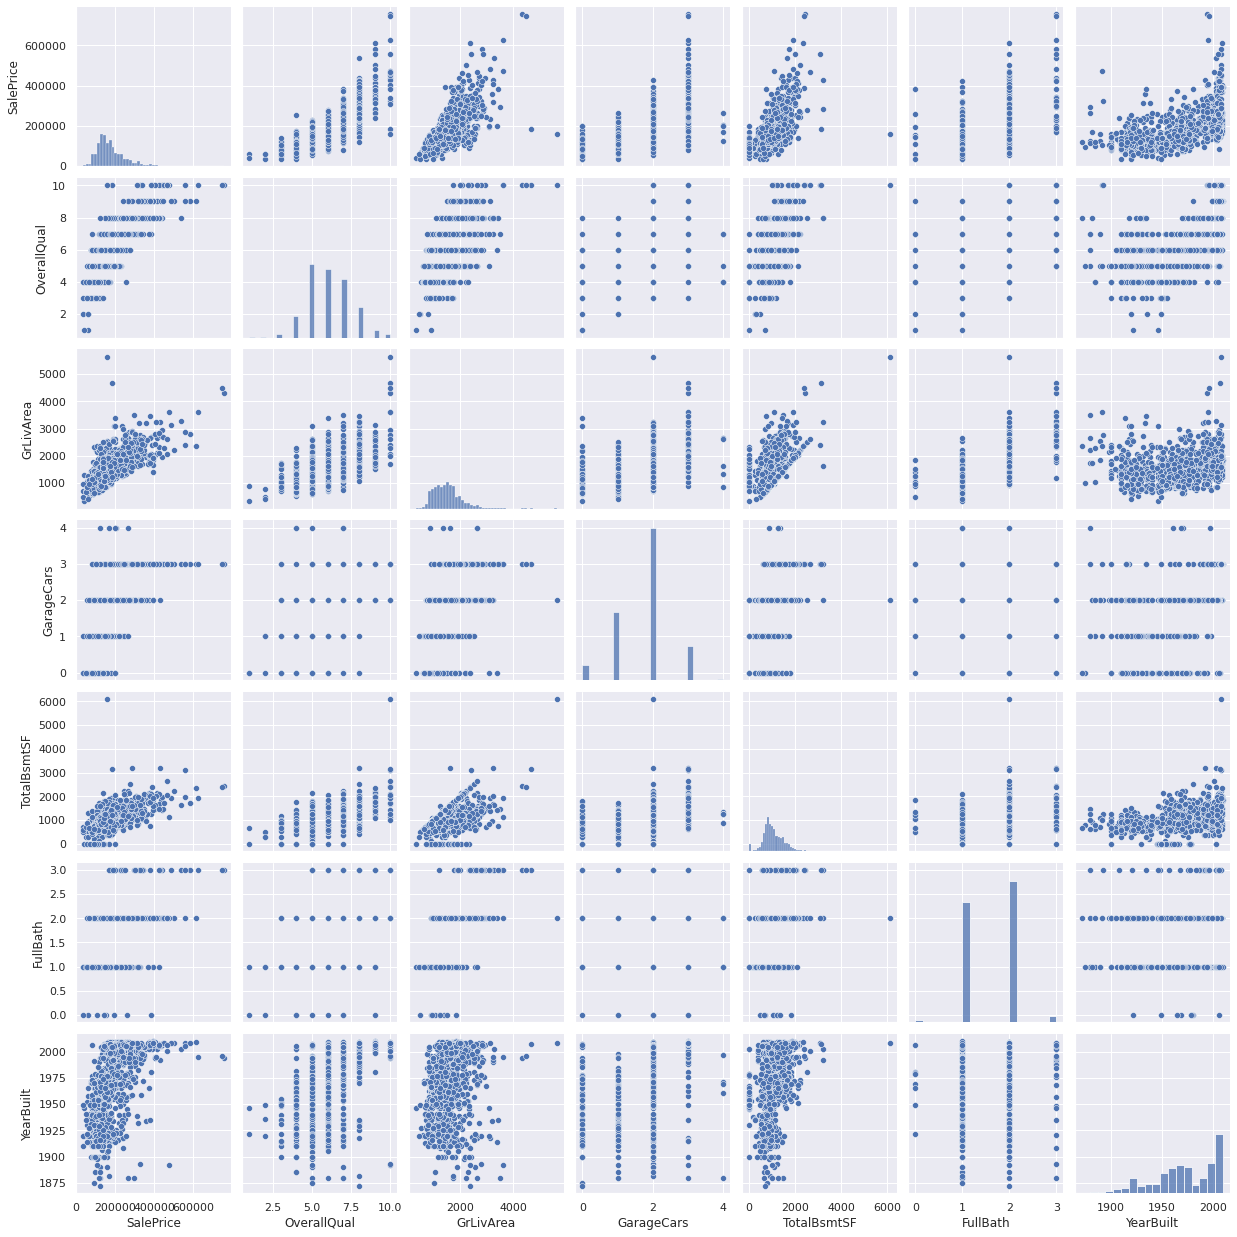

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing_train_df[cols], size = 2.5)
plt.show()

Inspecionando os recursos que têm altas correlações como implícito anteriormente, LotArea e LotFrontage têm uma quantidade considerável de 0,91. Usando a correlação para estimar os valores ausentes do LotFrontage considerando o Lot como um quadrado e fazendo a raiz quadrada da LotArea. Outro par de recursos altamente correlacionados são GarageArea e GarageCars. Sendo quase diretamente afetados um pelo outro, portanto, a alta correlação é esperada. Algumas das outras paris altamente correlacionadas são TotRmsAbvGrd e GrLivArea, 1stFlrSF e TotalBsmtSF, e SalePrice e OverallQual:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


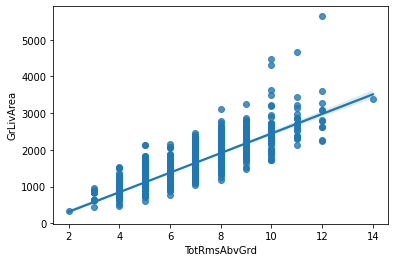

In [53]:
sns.regplot(housing_train_df['TotRmsAbvGrd'],housing_train_df['GrLivArea'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


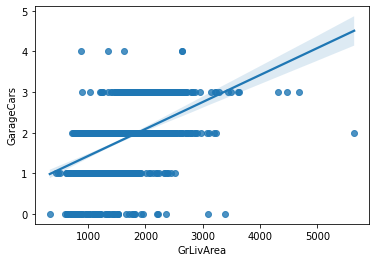

In [54]:
sns.regplot(housing_train_df['GrLivArea'],housing_train_df['GarageCars'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


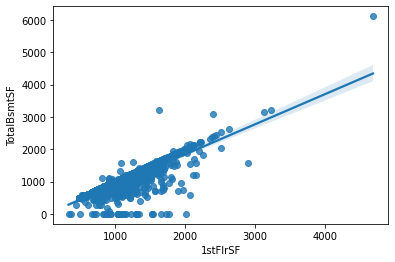

In [55]:
sns.regplot(housing_train_df['1stFlrSF'],housing_train_df['TotalBsmtSF'])

In [28]:
pd.DataFrame(housing_train_df.corr()['SalePrice'].sort_values(ascending = False))

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


As caracteristicas que tiverem uma correlação maior entre SalePrice terão um efeito maior no modelo. Esses dados devem ser o mais limpos possível para obter o melhor resultado no modelo. Visualizando os recursos com maior correlação (>0,6) e verificando se eles apresentam alguma descontinuidade ou outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


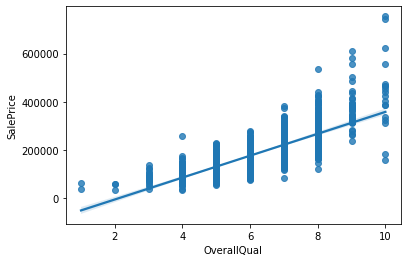

In [58]:
sns.regplot(housing_train_df['OverallQual'],housing_train_df['SalePrice'])

Esta é uma variável categórica e, portanto, descartar valores discrepantes não afetaria muito nosso resultado não havendo outliers cruciais.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


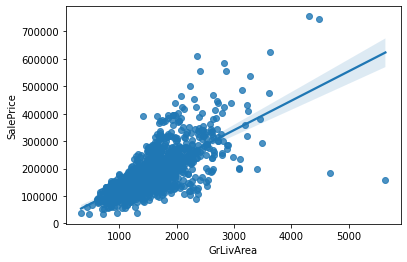

In [59]:
sns.regplot(housing_train_df['GrLivArea'],housing_train_df['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


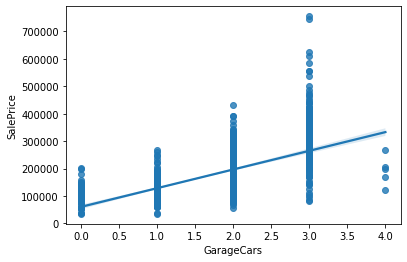

In [61]:
sns.regplot(housing_train_df['GarageCars'],housing_train_df['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


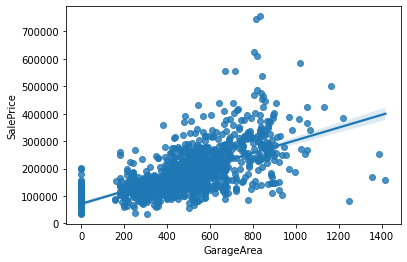

In [60]:
sns.regplot(housing_train_df['GarageArea'],housing_train_df['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


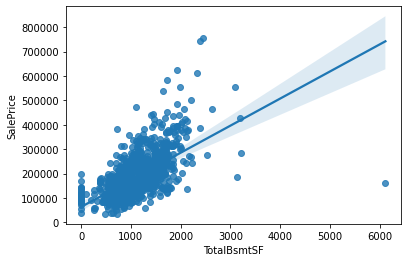

In [62]:
sns.regplot(housing_train_df['TotalBsmtSF'],housing_train_df['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


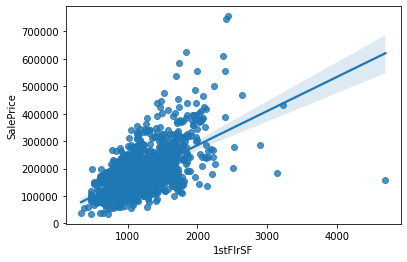

In [63]:
sns.regplot(housing_train_df['1stFlrSF'],housing_train_df['SalePrice'])

Removendo os outliers

In [71]:
housing_train_df = housing_train_df[housing_train_df.GrLivArea < 4500]
housing_train_df = housing_train_df[housing_train_df.GarageArea < 1250]
housing_train_df = housing_train_df[housing_train_df.TotalBsmtSF < 3500]
housing_train_df = housing_train_df[housing_train_df['1stFlrSF'] < 3500]
housing_train_df.reset_index(drop = True, inplace = True)

Machine Learning pre processamento

In [72]:
#Save old train dataframe in case we need it again 
old_train = housing_train_df.copy()
old_test= housing_test_df.copy()
salesprice = housing_train_df['SalePrice']

#Dropping unnecessary features
housing_train_df.drop(['Id'],axis=1, inplace=True)
housing_test_df.drop(['Id'],axis=1, inplace=True)
housing_train_df.drop(['SalePrice'],axis=1, inplace=True)

In [73]:
housing_train_df_dummie = pd.get_dummies(housing_train_df).reset_index(drop=True)
housing_test_df_dummie = pd.get_dummies(housing_test_df).reset_index(drop=True)

In [75]:
#teste 2
all_data = pd.concat((housing_train_df, housing_test_df)).reset_index(drop = True)
all_data_dummies = pd.get_dummies(all_data).reset_index(drop=True)
train_df_dummie = all_data_dummies[:1456]
test_df_dummie = all_data_dummies[1456:]

In [32]:
X_train = housing_train_df
Y_train = salesprice
X_test = housing_test_df

X_train = X_train.fillna(-1)
Y_train = Y_train.fillna(-1)

In [77]:
#teste 2
X_train = train_df_dummie
Y_train = salesprice
X_test = test_df_dummie

X_train = X_train.fillna(-1)
Y_train = Y_train.fillna(-1)

In [78]:
X_train.shape, Y_train.shape, X_test.shape

((1456, 301), (1456,), (1459, 301))

In [79]:
missing_percentage(X_train)
missing_percentage(X_test)

,Total,Percent


<h1>Machine Learning<h1>

Logistic Regression

In [80]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


4.74

In [82]:
sub = pd.Series(Y_pred ,index=old_test['Id'], name='SalePrice')
sub.to_csv('LinearSVC.csv', header=True)
!head -n10 LinearSVC.csv

Id,SalePrice
1461,145000
1462,151500
1463,215000
1464,140000
1465,192000
1466,178000
1467,148000
1468,178000
1469,180000


Random Forest Classifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

97.4

In [ ]:
sub = pd.Series(Y_pred ,index=housing_test_df['Id'], name='SalePrice')
sub.to_csv('RandomForestClassifier.csv', header=True)
!head -n10 RandomForestClassifier.csv

Id,SalePrice
1461,109500
1462,145250
1463,192140
1464,181000
1465,180000
1466,175900
1467,173000
1468,177000
1469,180000
